### import all necessary dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
import os
import requests
# from zipfile import ZipFile
# import os
# import glob
# import pandas as pd

%matplotlib inline

### Link to URL
https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [2]:
def download_file(url,filename=''):
    try:
        if filename:
            pass
        else:
            req = requests.get(url)
            filename = req.url[url.rfind('/')+1:]
        
        with requests.get(url) as req:
            with open(filename, 'wb') as f:
                for chunk in req.iter_content():
                    if chunk:
                        f.write(chunk)
            return filename
    except Exception as err:
        print(str(err))
        return None

In [3]:
if __name__=="__main__":
    downloadurl = input("Enter the URL for the required dataset : ")
    print(download_file(downloadurl,'BostonHousing.csv'))

Enter the URL for the required dataset : https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv
BostonHousing.csv


### Load the Data

In [4]:
boston = pd.read_csv("BostonHousing.csv")

In [5]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


1. CRIM: Per capita crime rate by town
2. ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
3. INDUS: Proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: Nitric oxide concentration (parts per 10 million)
6. RM: Average number of rooms per dwelling
7. AGE: Proportion of owner-occupied units built prior to 1940
8. DIS: Weighted distances to five Boston employment centers
9. RAD: Index of accessibility to radial highways
10. TAX: Full-value property tax rate per 10,000 us Dollars
11. PTRATIO : Pupil-teacher ratio by town
12. B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
13. LSTAT: Percentage of lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000s

### Let's check is there any null values presents in the dataset

In [6]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Let's have a quick info about the dataset

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Let's have a quick summary of the dataset

In [8]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Visualizing distributions of data

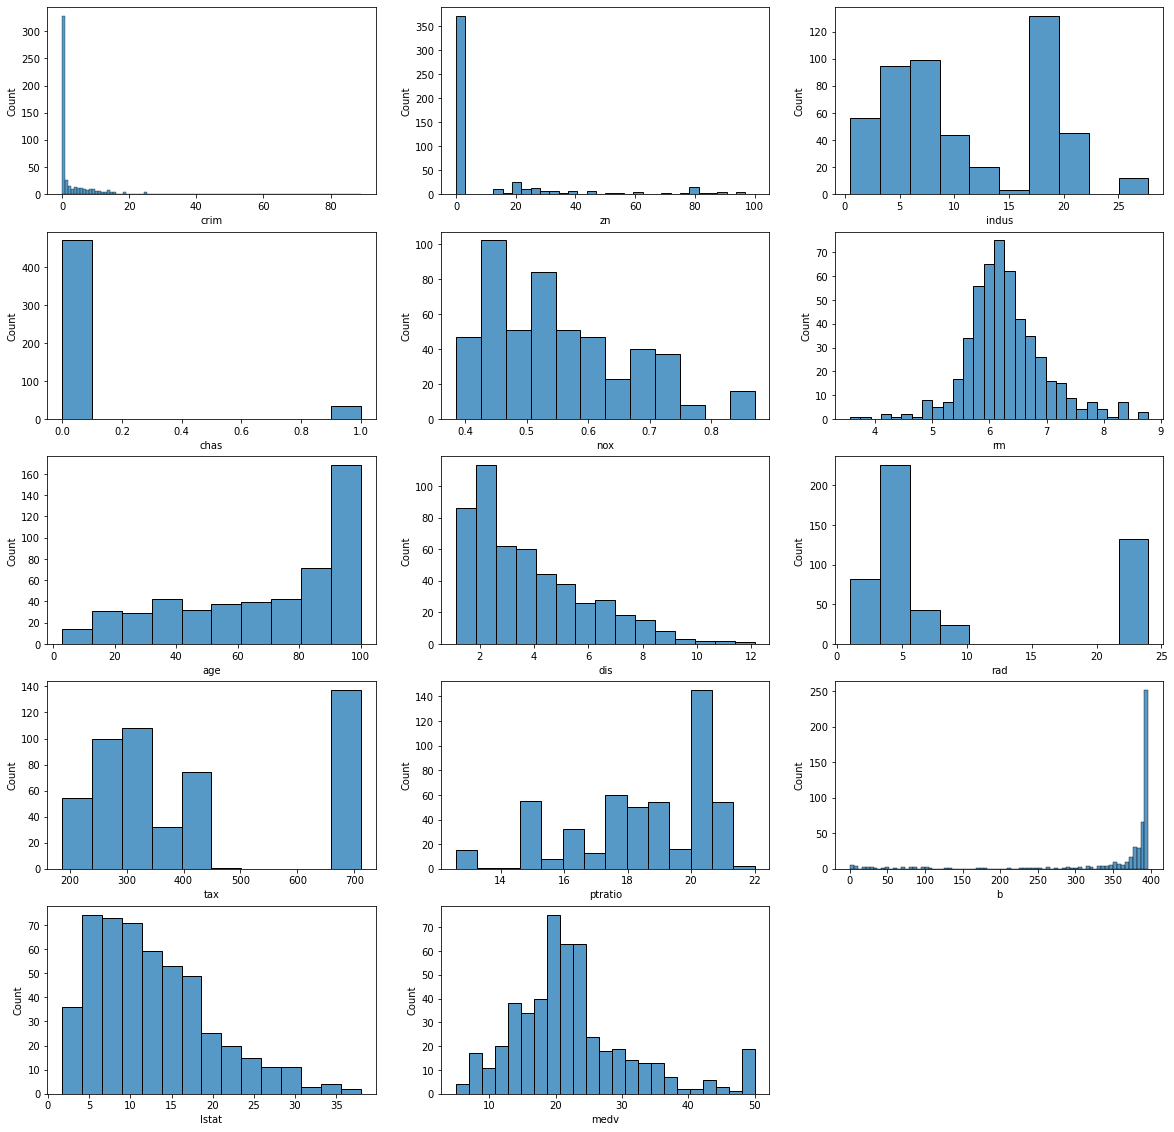

In [9]:
def data_distribution(data):
    try:
        plt.figure(figsize=(20,20))
        n_rows = (len(data.columns)-1)//3+1
        n_cols = 3
        
        for i in range(len(data.columns)):
            plt.subplot(n_rows,n_cols,i+1)
            sns.histplot(data=data,x=data[data.columns[i]])
            
        return plt.show()
    except Exception as err:
        print(err)
        
if __name__=="__main__":
    data_distribution(boston)

### Let's plot sctter plot to see the interaction of features with the target label

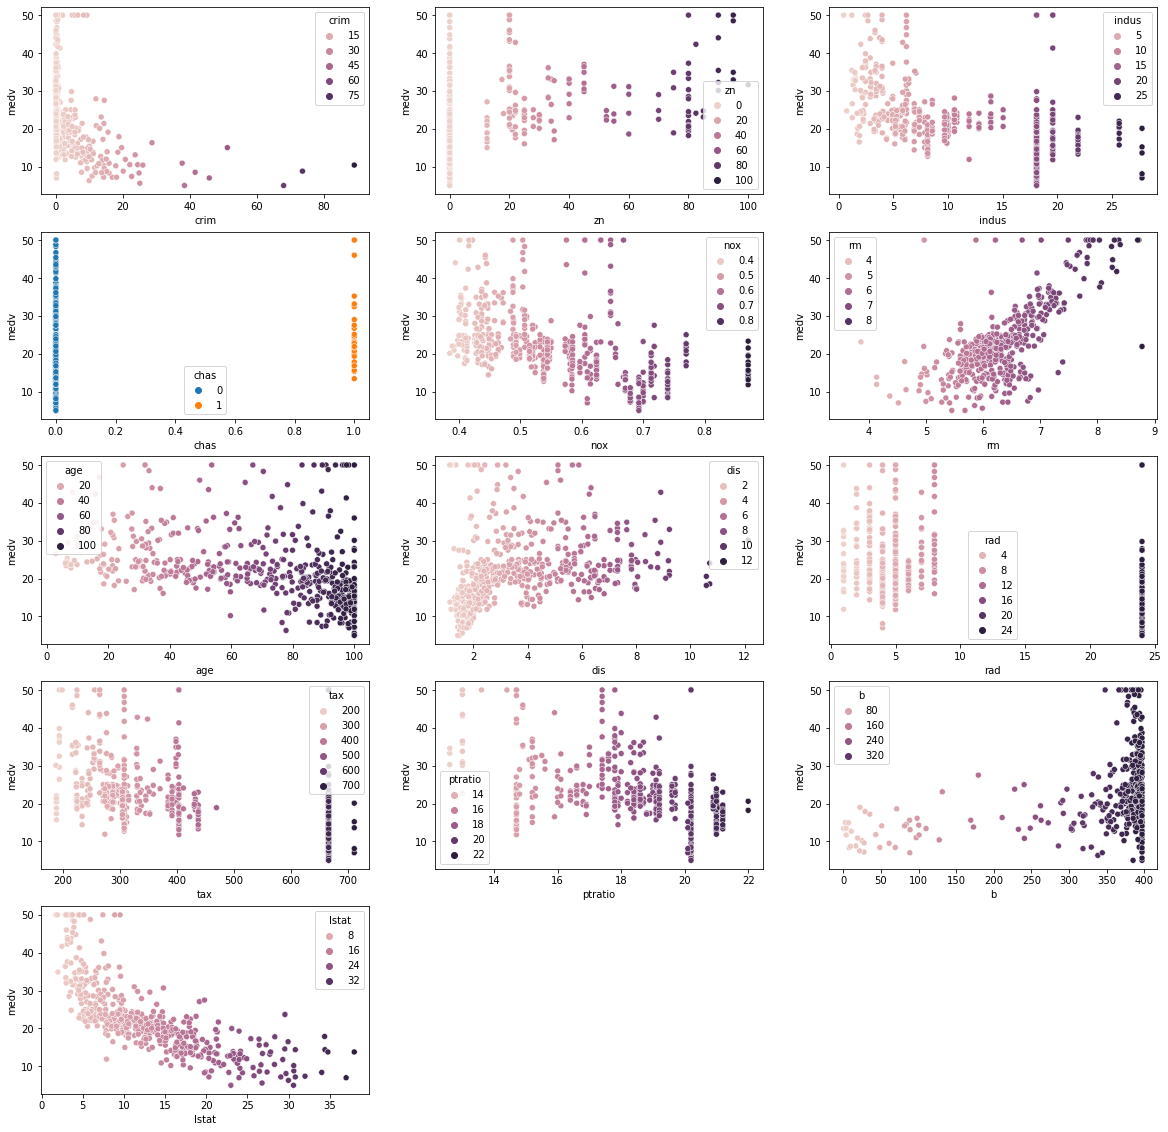

In [10]:
def interaction_with_target(data,target_col):
    try:
        plt.figure(figsize=(20,20))
        n_rows = (len(data.columns)-1)//3+1
        n_cols = 3
        
        for i in range(len(data.columns)-1):
            plt.subplot(n_rows,n_cols,i+1)
            sns.scatterplot(x=data[data.columns[i]],y=data[target_col],hue=data[data.columns[i]])

        return plt.show() 
        
    except Exception as err:
        print(str(err))
        
if __name__=="__main__":
    interaction_with_target(boston,'medv')   

### Standardize features by removing the mean and scaling to unit variance.

In [11]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [12]:
def standardize_features(data,label):
    try:
        X = data.drop(columns=[label])
        y = data[label]
        
        arr = scalar.fit_transform(X)
        
        standardized_X = pd.DataFrame(arr,columns=X.columns)
        
        return X,y,arr,standardized_X
    except Exception as err:
        print(str(err))
        
if __name__=="__main__":
    X, y, X_arr, scaled_X = standardize_features(boston,'medv')

### Visualizing distributions of data

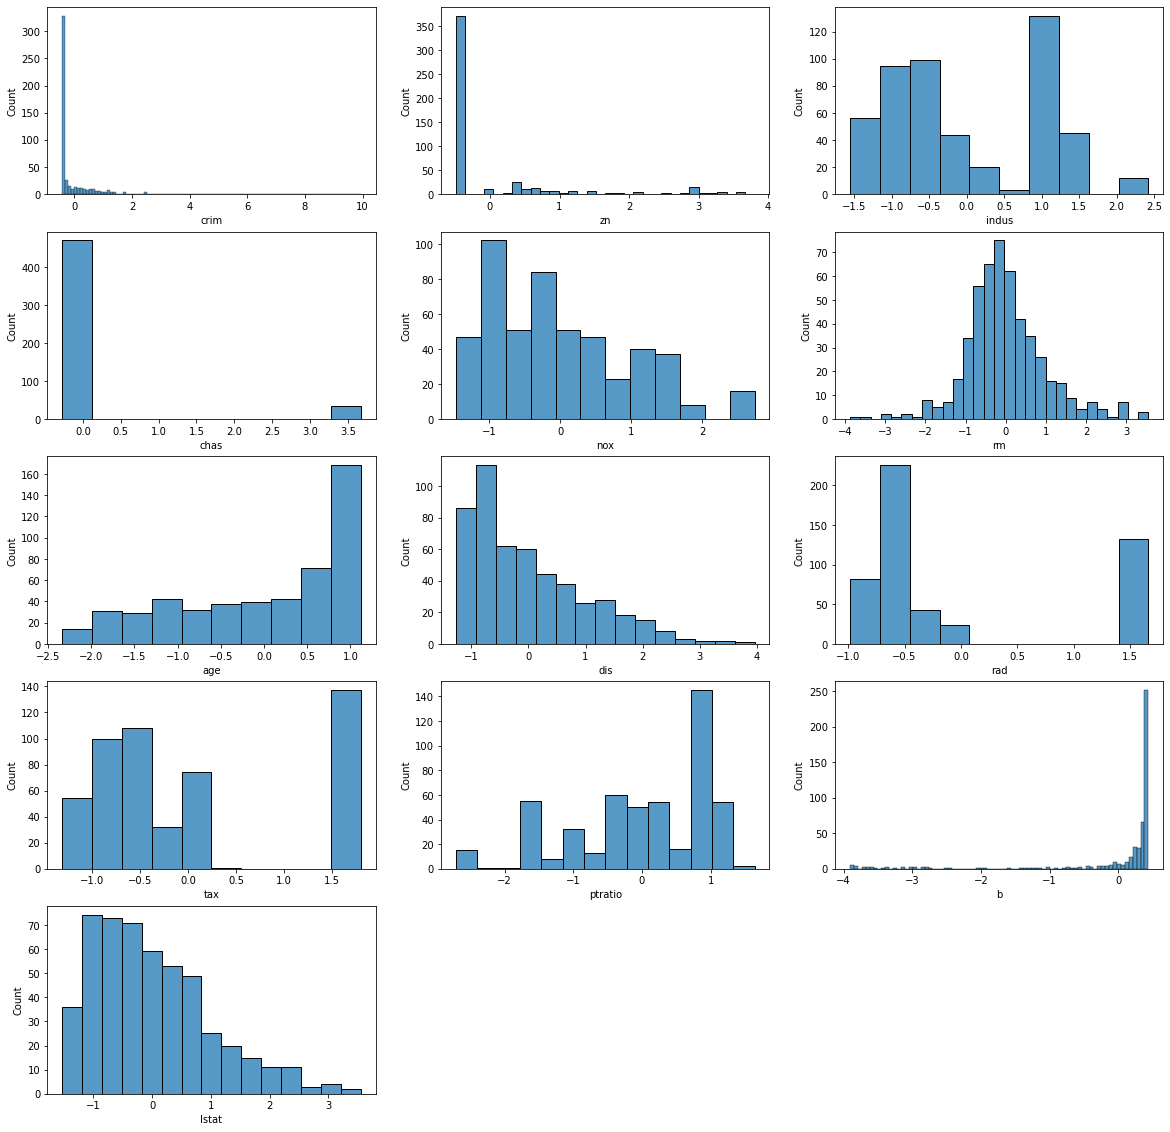

In [13]:
data_distribution(scaled_X)

### Check for multicolinearity with variance inflation factor(VIF)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
def compute_vif(features_arr,features_columns):
    try:
        vif = pd.DataFrame()
        vif['vif'] = [variance_inflation_factor(features_arr,i) for i in range(features_arr.shape[1])]
        vif['features'] = pd.DataFrame(features_arr,columns=features_columns).columns
        
        return vif
    except Exception as err:
        print(str(err))
        
if __name__=="__main__":
    data = X_arr
    cols = scaled_X.columns
    print(compute_vif(data,cols))

         vif features
0   1.792192     crim
1   2.298758       zn
2   3.991596    indus
3   1.073995     chas
4   4.393720      nox
5   1.933744       rm
6   3.100826      age
7   3.955945      dis
8   7.484496      rad
9   9.008554      tax
10  1.799084  ptratio
11  1.348521        b
12  2.941491    lstat


### Features Selection

In [16]:
import statsmodels.formula.api as smf

In [17]:
lm1 = smf.ols(formula="medv ~ lstat",data=boston).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           5.08e-88
Time:                        22:23:53   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lm2 = smf.ols(formula="medv ~ lstat + rm",data=boston).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          7.01e-112
Time:                        22:23:53   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
lstat         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
rm             5.0948      0.444     11.463      0.000       4.222       5.968
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm3 = smf.ols(formula="medv ~ lstat + rm + crim",data=boston).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.01e-112
Time:                        22:23:53   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5623      3.166     -0.809      0.419      -8.783       3.658
lstat         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
rm             5.2170      0.442     11.802      0.000       4.348       6.085
crim          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm4 = smf.ols(formula="medv ~ lstat + rm + crim + age",data=boston).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     229.3
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.02e-111
Time:                        22:23:53   Log-Likelihood:                -1577.0
No. Observations:                 506   AIC:                             3164.
Df Residuals:                     501   BIC:                             3185.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3491      3.171     -0.741      0.459      -8.579       3.881
lstat         -0.6126      0.056    -10.857      0.000      -0.723      -0.502
rm             5.1162      0.451     11.349      0.000       4.230       6.002
crim          -0.1064      0.032     -3.308      0.001      -0.170      -0.043
age            0.0126      0.011      1.129      0.259      -0.009       0.035
==============================================================================
Omnibus:                      161.909   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.137
Skew:                           1.467   Prob(JB):                    1.27e-120
Kurtosis:                       7.192   Cond. No.                         993.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
lm5 = smf.ols(formula="medv ~ lstat + rm + crim + age + chas",data=boston).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     192.5
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          4.69e-114
Time:                        22:23:53   Log-Likelihood:                -1568.7
No. Observations:                 506   AIC:                             3149.
Df Residuals:                     500   BIC:                             3175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8285      3.125     -0.585      0.559      -7.968       4.311
lstat         -0.5990      0.056    -10.762      0.000      -0.708      -0.490
rm             5.0290      0.444     11.315      0.000       4.156       5.902
crim          -0.0992      0.032     -3.127      0.002      -0.161      -0.037
age            0.0062      0.011      0.555      0.579      -0.016       0.028
chas           3.9217      0.961      4.079      0.000       2.033       5.811
==============================================================================
Omnibus:                      152.732   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              523.436
Skew:                           1.376   Prob(JB):                    2.17e-114
Kurtosis:                       7.154   Cond. No.                         994.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
lm6 = smf.ols(formula="medv ~ lstat + rm + crim + chas",data=boston).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     240.9
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          3.31e-115
Time:                        22:23:53   Log-Likelihood:                -1568.8
No. Observations:                 506   AIC:                             3148.
Df Residuals:                     501   BIC:                             3169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9205      3.118     -0.616      0.538      -8.047       4.206
lstat         -0.5824      0.047    -12.416      0.000      -0.675      -0.490
rm             5.0755      0.436     11.637      0.000       4.219       5.932
crim          -0.0974      0.032     -3.089      0.002      -0.159      -0.035
chas           3.9976      0.951      4.204      0.000       2.129       5.866
==============================================================================
Omnibus:                      157.140   Durbin-Watson:                   0.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              555.788
Skew:                           1.406   Prob(JB):                    2.05e-121
Kurtosis:                       7.296   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lm7 = smf.ols(formula="medv ~ lstat + rm + crim + chas + dis",data=boston).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          8.53e-117
Time:                        22:23:53   Log-Likelihood:                -1562.3
No. Observations:                 506   AIC:                             3137.
Df Residuals:                     500   BIC:                             3162.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1689      3.281      0.661      0.509      -4.278       8.616
lstat         -0.6543      0.050    -12.978      0.000      -0.753      -0.555
rm             4.8842      0.434     11.249      0.000       4.031       5.737
crim          -0.1200      0.032     -3.777      0.000      -0.182      -0.058
chas           3.4910      0.950      3.675      0.000       1.625       5.358
dis           -0.4901      0.135     -3.624      0.000      -0.756      -0.224
==============================================================================
Omnibus:                      132.196   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.230
Skew:                           1.215   Prob(JB):                     1.85e-90
Kurtosis:                       6.700   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lm8 = smf.ols(formula="medv ~ lstat + rm + crim + chas + dis",data=boston).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     200.0
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          8.53e-117
Time:                        22:23:53   Log-Likelihood:                -1562.3
No. Observations:                 506   AIC:                             3137.
Df Residuals:                     500   BIC:                             3162.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1689      3.281      0.661      0.509      -4.278       8.616
lstat         -0.6543      0.050    -12.978      0.000      -0.753      -0.555
rm             4.8842      0.434     11.249      0.000       4.031       5.737
crim          -0.1200      0.032     -3.777      0.000      -0.182      -0.058
chas           3.4910      0.950      3.675      0.000       1.625       5.358
dis           -0.4901      0.135     -3.624      0.000      -0.756      -0.224
==============================================================================
Omnibus:                      132.196   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.230
Skew:                           1.215   Prob(JB):                     1.85e-90
Kurtosis:                       6.700   Cond. No.                         234.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
lm9 = smf.ols(formula="medv ~ lstat + rm + crim + chas + dis + rad",data=boston).fit()
lm9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     168.7
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          1.28e-116
Time:                        22:23:53   Log-Likelihood:                -1559.9
No. Observations:                 506   AIC:                             3134.
Df Residuals:                     499   BIC:                             3163.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4549      3.272      0.750      0.453      -3.974       8.884
lstat         -0.6341      0.051    -12.408      0.000      -0.735      -0.534
rm             4.9479      0.434     11.410      0.000       4.096       5.800
crim          -0.0820      0.036     -2.264      0.024      -0.153      -0.011
chas           3.4922      0.947      3.689      0.000       1.632       5.352
dis           -0.5687      0.140     -4.074      0.000      -0.843      -0.294
rad           -0.0817      0.038     -2.153      0.032      -0.156      -0.007
==============================================================================
Omnibus:                      149.746   Durbin-Watson:                   0.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.116
Skew:                           1.337   Prob(JB):                    5.69e-115
Kurtosis:                       7.219   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
lm10 = smf.ols(formula="medv ~ lstat + rm + crim + chas + dis + rad + tax + ptratio +b",data=boston).fit()
lm10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     141.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          6.37e-131
Time:                        22:23:53   Log-Likelihood:                -1518.4
No. Observations:                 506   AIC:                             3057.
Df Residuals:                     496   BIC:                             3099.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2549      4.383      5.077      0.000      13.642      30.867
lstat         -0.5740      0.048    -11.928      0.000      -0.669      -0.479
rm             4.1870      0.415     10.081      0.000       3.371       5.003
crim          -0.0836      0.034     -2.478      0.014      -0.150      -0.017
chas           2.3438      0.883      2.654      0.008       0.609       4.079
dis           -0.6512      0.131     -4.964      0.000      -0.909      -0.393
rad            0.2634      0.065      4.024      0.000       0.135       0.392
tax           -0.0135      0.003     -4.024      0.000      -0.020      -0.007
ptratio       -0.9152      0.121     -7.586      0.000      -1.152      -0.678
b              0.0104      0.003      3.759      0.000       0.005       0.016
==============================================================================
Omnibus:                      185.369   Durbin-Watson:                   1.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              868.339
Skew:                           1.567   Prob(JB):                    2.77e-189
Kurtosis:                       8.600   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
"medv ~ lstat + rm + crim + chas + dis + rad + tax + ptratio +b"

'medv ~ lstat + rm + crim + chas + dis + rad + tax + ptratio +b'

In [28]:
scaled_X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [29]:
final_X = scaled_X.drop(columns=['zn','indus', 'nox', 'age'],axis=1)

In [30]:
final_X.head()

,crim,chas,rm,dis,rad,tax,ptratio,b,lstat
0,-0.419782,-0.272599,0.413672,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.272599,0.194274,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.272599,1.282714,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.272599,1.016303,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.272599,1.228577,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


### Split arrays or matrices into random train and test subsets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(final_X,y,test_size=0.15,random_state=100)

### Ordinary least squares Linear Regression.

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.8068080513134132

### Adjusted R-Squared

In [34]:
def adj_r2(x,y,model):
    try:
        r2 = model.score(x,y)
        n = x.shape[0]
        p = x.shape[1]
        adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
        return adjusted_r2
    except Exception as err:
        print(str(err))
        
        
if __name__=="__main__":
    print(adj_r2(X_test,y_test,lm))        

0.7804636946743331


### Linear least squares with l2 regularization

In [35]:
from sklearn.linear_model import RidgeCV,Ridge
def L2_regularizer(x_train,x_test,y_train,y_test):
    try:
        ridgecv = RidgeCV(alphas=np.random.uniform(0,10,50), cv = 10, normalize=True)
        ridgecv.fit(x_train,y_train)
        alpha = ridgecv.alpha_
        ridge = Ridge(alpha=alpha)
        
        return ridge.fit(x_train,y_train), ridge.score(x_test,y_test)
    
    except Exception as err:
        print(str(err))
        
if __name__=="__main__":
    L2_model, L2_score = L2_regularizer(X_train,X_test,y_train,y_test)
    
L2_score

0.8068227657842615

### Linear Model trained with L1 prior as regularizer (aka the Lasso)

In [36]:
from sklearn.linear_model import Lasso, LassoCV
def L1_regularizer(x_train,x_test,y_train,y_test):
    try:
        lassocv = LassoCV(alphas=None,cv=10,max_iter=200, normalize=True)
        lassocv.fit(X_train,y_train)
        alpha = lassocv.alpha_
        lasso = Lasso(alpha=alpha)
        
        return lasso.fit(x_train,y_train), lasso.score(x_test,y_test)
    except Exception as err:
        print(str(err))
        
if __name__=="__main__":
    L1_model, L1_score = L1_regularizer(X_train,X_test,y_train,y_test)
    
L1_score

0.8067810672457668

### Linear regression with combined L1 and L2 priors as regularizer.

In [37]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
def L1L2_regularizer(x_train,x_test,y_train,y_test):
    try:
        elasticCV = ElasticNetCV(alphas=None,cv=10)
        elasticCV.fit(x_train,y_train)
        alpha=elasticCV.alpha_
        l1_ratio=elasticCV.l1_ratio_
        elastic = ElasticNet(alpha=alpha,l1_ratio=l1_ratio)
        
        return elastic.fit(x_train,y_train), elastic.score(x_test,y_test)
    except Exception as err:
        print(str(err))
        
if __name__=="__main__":
    elasticnet_model, elasticnet_score = L1L2_regularizer(X_train,X_test,y_train,y_test)
    
elasticnet_score

0.806306976773105

In [38]:
import pickle

In [58]:
pickle.dump(lm,open('linear_model.pickle','wb'))

In [59]:
pickle.dump(L1_model,open('lasso.pickle','wb'))

In [60]:
pickle.dump(L2_model,open('ridge.pickle','wb'))

In [61]:
pickle.dump(elasticnet_model,open('elasticnet.pickle','wb'))

In [62]:
os.listdir()

['.idea',
 '.ipynb_checkpoints',
 'BostonHousing.csv',
 'elasticnet.pickle',
 'lasso.pickle',
 'linear_model.pickle',
 'ridge.pickle',
 'static',
 'templates',
 'Untitled.ipynb']

In [39]:
X_test

,crim,chas,rm,dis,rad,tax,ptratio,b,lstat
198,-0.416132,-0.272599,1.409508,1.670427,-0.867883,-0.470612,-2.707379,0.389519,-0.845677
229,-0.369106,-0.272599,0.380905,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.246574
502,-0.415249,-0.272599,-0.234548,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
31,-0.262864,-0.272599,-0.302931,0.180620,-0.637962,-0.601276,1.176466,0.219901,0.054238
315,-0.391010,-0.272599,-0.825781,0.071285,-0.637962,-0.619094,-0.025677,0.435789,-0.161629
...,...,...,...,...,...,...,...,...,...
221,-0.373071,3.668398,-0.171863,-0.355121,-0.178120,-0.601276,-0.488039,0.422851,1.234502
384,1.916827,-0.272599,-2.730550,-1.119752,1.661245,1.530926,0.806576,-0.776759,2.519895
22,-0.277091,-0.272599,-0.203205,0.086449,-0.637962,-0.601276,1.176466,0.441052,0.850425
41,-0.405687,-0.272599,0.691480,0.915493,-0.752922,-1.040783,-0.256858,0.315071,-1.095187


In [40]:
y_test

198    34.6
229    31.5
502    20.6
31     14.5
315    16.2
       ... 
221    21.7
384     8.8
22     15.2
41     26.6
437     8.7
Name: medv, Length: 76, dtype: float64

In [44]:
physical_model1 = pickle.load(open('linear_model.pickle', 'rb' ))

In [45]:
physical_model1.predict([[-0.416132,-0.272599,1.409508,1.670427,-0.867883,-0.470612,-2.707379,0.389519,-0.845677]])

array([32.61745619])

In [46]:
physical_model2 = pickle.load(open('lasso.pickle','rb'))

In [47]:
physical_model2.predict([[-0.416132,-0.272599,1.409508,1.670427,-0.867883,-0.470612,-2.707379,0.389519,-0.845677]])

array([32.61931029])

In [49]:
physical_model3 = pickle.load(open('ridge.pickle','rb'))

In [50]:
physical_model3.predict([[-0.416132,-0.272599,1.409508,1.670427,-0.867883,-0.470612,-2.707379,0.389519,-0.845677]])

array([32.61999263])

In [52]:
physical_model4 = pickle.load(open('elasticnet.pickle','rb'))

In [53]:
physical_model4.predict([[-0.416132,-0.272599,1.409508,1.670427,-0.867883,-0.470612,-2.707379,0.389519,-0.845677]])

array([32.76357125])